<div class="alert alert-info"><h4>Note</h4><p> 
    This notebook is still work in progress and the content has not been fact checked! <a href="url">here</a>.
</p></div>

# The likelihood of the estimated parameters of a linear model:

The first need we need is a function for the likelihood of the data under given parameters. That's the same concept as before, but it is a little bit more complicated, for several reasons. The first reason is that compared to our coin toss example where the probability of observing a given number of heads depended on a single parameter of interest (the probability of getting head), in our current problem we have several parameters: $\beta_0$, $\beta_1$ (but also the error term). Accordingly, we need a likelihood function that tells us the probability of observing a given outcome $y_i$ given the value of several parameters. In addition, compared to the previous example where the data were a single observation $y$ (the number of head we observed in our experiment), in the current case we have many observations $y_i$ (one per penguin). We will see how to deal with these two complications one by one before putting everything together. 

## The likelihood of one observation
The first need we need is a function for the likelihood of the data under given parameters. It's easy to get confused at this point, so let's clarify. In Bayesian inference, the likelihood is the probability of observing the data given particular values of the parameters. It answers questions like:

- "If $\beta_0=0$ and $\beta_1=0.21$, what is the probability of observing a penguin with flipper length 190mm that weight 70 kg?"

Importantly, the likleihood is a probability density function, which is a function that can answer that question for any values of $\beta_0$ and $\beta_1$. 

Before you continue reading, try to think about what that could look like. 

An intuition you might have is that values of $yi$​ close to the prediction of your model should be more likely. Indeed, if you examine the error distribution histogram from earlier, you'll notice there are fewer penguins with large errors and more with smaller errors. Formally, this suggests that the likelihood of observing the data given certain parameters $\beta_0$ and $\beta_1$​ is higher when the observed data are close to the model's predictions.

Now, if you tried to look at the likelihood of the data separately for each parameter, you might expect to see something resembling a normal distribution: the data close to the expected value should be most likely, and the likelihood should decrease as you move further away. However, you cannot look at the likelihood of the data for each parameter separately; you need to consider them together. This is because the probability of observing a given data point $y_i$​ depends on both $\beta_0$​ and $\beta_1$​ simultaneously.

To proceed, it would be helpful to know the form of the distribution that represents the likelihood of observing a given data point given these parameters. We can achieve this by making an assumption about the error term $\epsilon$​ to ensure that the likelihood function is normally distributed.

Once again, our model is defined as:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon$$

So our data y_i is basically a constant ($beta_0$), plus a constant ($beta_1$) multiplied by so fixed values (flipper length, $x_i$), plus the error term. As we already mentioned, one assumption of the linear model is that the $\epsilon$ is normally distributed around 0, so it is a normal distribution. This is stated as such:

$$\epsilon \sim \mathcal{N}(0, \sigma^2)$$

Which means that the error follows a normal distribution centered on 0 and with standard deviation $\sigma$. Actually, the very reason behind the assumption that the error should be normally distributed is so that the likelihood function also follows a normal distribution. If that's not the case, everything breaks. 


**So what's the formula for the likelihood of a single observation $y_i$ given the parameters? $P(y_i|\beta_0, \beta_1, \sigma^2)$**

We won't be able to go into the why here (perhaps we will write a separate chapter about it at some point), but the answer is this:

$$P(y_i|\beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{(y_i-(\beta_0 + \beta_1*x_i))^2}{2\sigma^2}}$$

If you remember the normal distribution formulae from above, it's basically the same, except we replaced the $\mu$ term by: $\beta_0 + \beta_1*x_i$. This kind of makes sense when you think about it: the mean value in the case of a linear regression is the value predicted by the model. This is called the **expected value**. If you have your observation $y_i$ very far away from your model, then $(y_i-(\beta_0 + \beta_1*x_i))^2$ increases, and because you have a minus in front, the exponent yields a smaller result. And so the further away your observation is from your model predicted value ($\beta_0 + \beta_1*x_i$), the more the likelihood decreases.

Let's write some code to illustrate this function. We will first simulate some data then use the optimal least square method to retrive the fitted values of $\beta_0$ and $\beta_1$. Then, we will compute the error of each single point to find the data point which has the smallest error, and the one that has the largest error. Again, the likelihood function give us the likelihood of the observation given any values of the parameters. And we saw that the probability of observing the data should be concentrated around the values of $\beta_0$ and $\beta_1$ that result in prediction that are closest to that observation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load functions previously created:
def linear_mdl(x, beta_0, beta_1, error_mu, error_sigma):
    y = beta_0 + beta_1 * x + np.random.normal(error_mu, error_sigma, size=x.shape[0])
    return y

def fit_linear_model(y, x):
    # Calculate beta_1:
    beta_1 = np.sum((x-np.mean(x))*(y-np.mean(y))) / np.sum((x-np.mean(x))**2)
    # Calcuate beta_0:
    beta_0 = np.mean(y) - beta_1 * np.mean(x)

    return beta_0, beta_1

def normal_pdf(x, mu, sigma):
    p_x = (1/(np.sqrt(2*np.pi*sigma**2))) * np.e**(-((x-mu)**2)/(2*sigma**2))
    return p_x


# Define the parameters for our simulation:
flipper_length_mm = np.arange(170, 230, 2)  # Let's say we collected the flipper length of penguins and that these are between 170 and 230mm

def single_obs_likelihood(yi, xi, b0, b1, sigma):
    """
    Computes the likelihood of observing yi given xi for parameters b0, b1, and sigma.
    """
    # Compute square of the error
    sq_err = (yi - (b0 + b1 * xi))**2
    # Compute normalization constant
    norm_k = 1/np.sqrt(2*np.pi*sigma**2)

    # Compute hte likelihood
    return norm_k * np.exp(-(sq_err/(2*sigma**2))) 

# Set the parameters:
beta_0_gt = 0
beta_1_gt = 0.22
error_mu = 0
error_sigma = 2

# Simulate some data:
y = linear_mdl(flipper_length_mm, beta_0_gt, beta_1_gt, error_mu, error_sigma)

# Fit the model:
beta_0, beta_1 = fit_linear_model(y, flipper_length_mm)
print(f'Estimated beta_1={np.round(beta_1, 3)}')
print(f'Estimated beta_0={np.round(beta_0, 3)}')

# Compute the error:
err = y - (beta_0 + beta_1 * flipper_length_mm)

# Find the minimal error:
min_error = err[np.argmin(err**2)]
predicted_val = beta_0 + beta_1 * flipper_length_mm[np.argmin(err**2)]
observed_val = y[np.argmin(err**2)]
print("-"*40)
print(f"The smallest error is of {min_error} kg")
print(f"The model predicted {predicted_val} kg")
print(f"The observed weigth is {observed_val} kg")

Estimated beta_1=0.204
Estimated beta_0=3.642
----------------------------------------
The smallest error is of 0.009047247692230087 kg
The model predicted 43.202129988025746 kg
The observed weigth is 43.211177235717976 kg


Computing the likelihood of y=43.211177235717976 for the penguin with flipper length=194


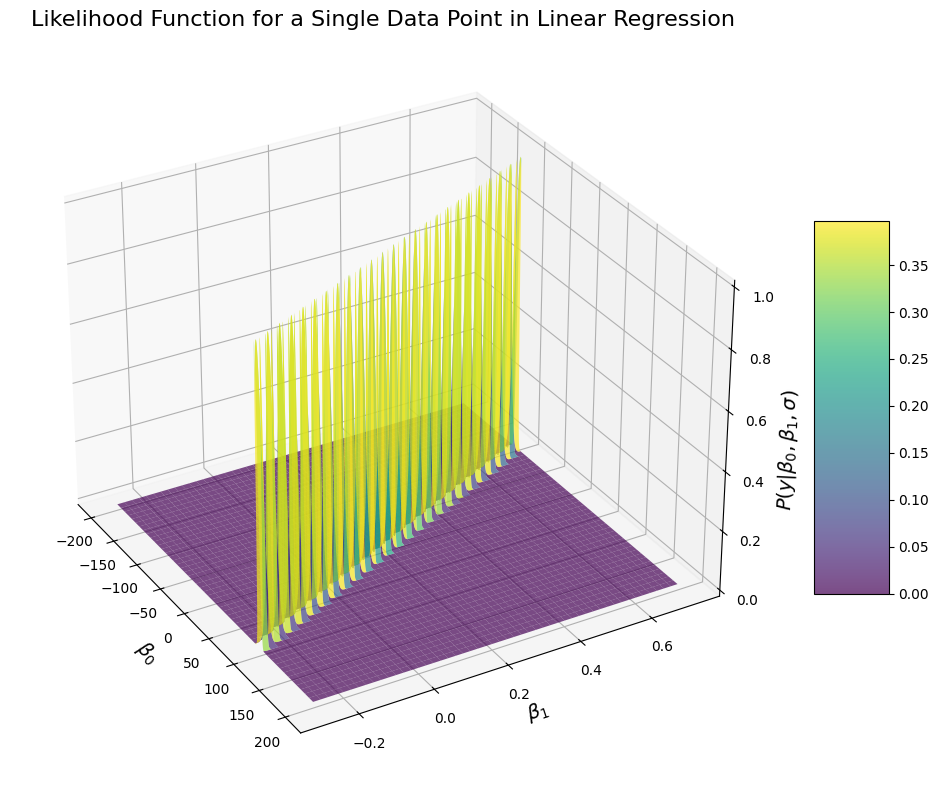

In [2]:
from matplotlib import cm

# Plot the probability of each observation across several values of b0 and b1:
b0s = np.linspace(beta_0_gt -200, beta_0_gt + 200, 1000)
b1s = np.linspace(beta_1_gt - 0.5, beta_1_gt + 0.5, 1000)
B0s, B1s  = np.meshgrid(b0s, b1s)

# Compute the likelihood for the value with the smallest error:
print(f"Computing the likelihood of y={y[np.argmin(err**2)]} for the penguin with flipper length={flipper_length_mm[np.argmin(err**2)]}")
likelihood = single_obs_likelihood(y[np.argmin(err**2)], flipper_length_mm[np.argmin(err**2)], B0s, B1s, error_sigma)
# Normalize by max to improve viz
likelihood /= np.max(likelihood)
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(B0s, B1s, likelihood, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
# Customize the axes
ax.set_xlabel(r'$\beta_0$', fontsize=14)
ax.set_ylabel(r'$\beta_1$', fontsize=14)
ax.set_zlabel(r'$P(y|\beta_0, \beta_1, \sigma)$', fontsize=14)
ax.set_title('Likelihood Function for a Single Data Point in Linear Regression', fontsize=16)
# Adjust viewing angle for better visualization
ax.view_init(elev=30, azim=-30)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

This probably doesn't look like what you'd have expected (at least it doesn't look like what I would have expected). The results look like there is a ridge along which the probability of the data is very high, and everyhing outside of it is very low. This shape is however to be expected. This is because with a single data point, there isn't enough data to determine the likelihood of the data given the parameter. In the current example, we are looking at the likelihood of observing a penguin weighting 43.85Kg with flipper size of 196mm, given the values of $\beta_0$ and $\beta_1$ and our model $y = \beta_0 + \beta_1 * x$. But of course, there are many possible values of $\beta_0$ and $\beta_1$ that can yield 43.85:

$$\beta_0 + \beta_1 * 196 = 43.85$$

There is an infinity of solution:

If we fix $\beta_0$ at 1, then: 

$$\beta_1 = (43.85 - 1) / 196$$

This is why the probability density function of observing a given value given any value of $\beta_0$ and $beta_1$ does not have a single peak, because there are many configuration of parameters under which the data are equally likely. 

This may seem confusing, but don't worry if you don't understand everything, it's difficult to get good intuition for these things. What matters is that we have the formulae to get the likelihood of a single observation. So now we can tackle the second complication to get the likelihood for our model

## The likelihood of several observation
Now that we know the likelihood for a single observation, we can try and understand how we can deal with many observation. Indeed, for our current model, we want to know not only the likelihood of observing a value $y_i$ but rather the likelihood of observing all the data $y$ (all the penguins with their flipper length and weights) given the parameters. For this, we need to call upon an additional assumption of a linear model: the data should be independently and identically distributed, which relates ot our previous assumption about the normal distribution of the error. What that means is that we need to assume that each observation is independent from each other. If that is the case (which it should always be if you are running a linear model), then the likelihood of observing all data point is the product of the likelihood of each data point:

$$P(y|\beta_0, \beta_1, \sigma) = P(y_1|\beta_0, \beta_1, \sigma) * P(y_2|\beta_0, \beta_1, \sigma) * ... P(y_n|\beta_0, \beta_1, \sigma)$$

Where $n$ is the number of observations (i.e. the number of penguins). You can rewrite the expression above like so:

$$P(y|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n} P(y_i|\beta_0, \beta_1, \sigma)$$

The symbol $\prod$ means multiplication from $i \to n$, similar to the $\sum$ operator.

And so if we replace $P(y_i|\beta_0, \beta_1, \sigma)$ with the formulae we had before, we get the following:

$$P(y|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n}[\frac{1}{\sqrt{2\pi\sigma^2}} exp^{-\frac{[y_i-(\beta_0 + \beta_1x_i)]^2}{2\sigma^2}}]$$

We can simplify this formulae a little, just as we did in the previous chapter. The term $\frac{1}{\sqrt{2\pi\sigma^2}}$ doesn't depend on $\beta_0$ nor on $\beta_1$, sp we can take it out:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-(\beta_0 + \beta_1x_i)]^2}{2\sigma^2}}$$

So again, not a crazy complicated formulae. We can implement it programmatically and then see what the likelihood of our data will look like:

In [3]:
def lm_likelihood(y, x, b0, b1, sigma):
    """
    Computes the likelihood of observing y given x for parameters b0, b1, and sigma.
    
        Parameters:
        - y : array-like, observed values
        - x : array-like, predictor values
        - b0 : float, intercept parameter
        - b1 : float, slope parameter
        - sigma : float, standard deviation of the error term
        
        Returns:
        - likelihood : float, the likelihood of the observed data given the parameters
    """
    # Check number of observations:
    n = y.shape[0]

    # Calculate the predicted values using the linear model
    y_pred = b0 + b1 * x

    # Compute the squared residuals (y - y_pred)^2
    squared_residuals = (y - y_pred) ** 2

    # Calculate the likelihood for each observation
    norm_const = (1 / np.sqrt(2 * np.pi * sigma**2))**n

    # Product of each likelihood:
    likelihoods_prod = np.prod(np.exp(-(squared_residuals/(2*sigma**2))))

    return norm_const * likelihoods_prod

Now that we have implemented the function for the likelihood, we can try plot the likelihood of our observation given various values of b0 and b1. We will do the same as before: simulate data (so that we know the ground truth), then compute the likelihood of our data given a range of $\beta_0$ and $\beta_1$:

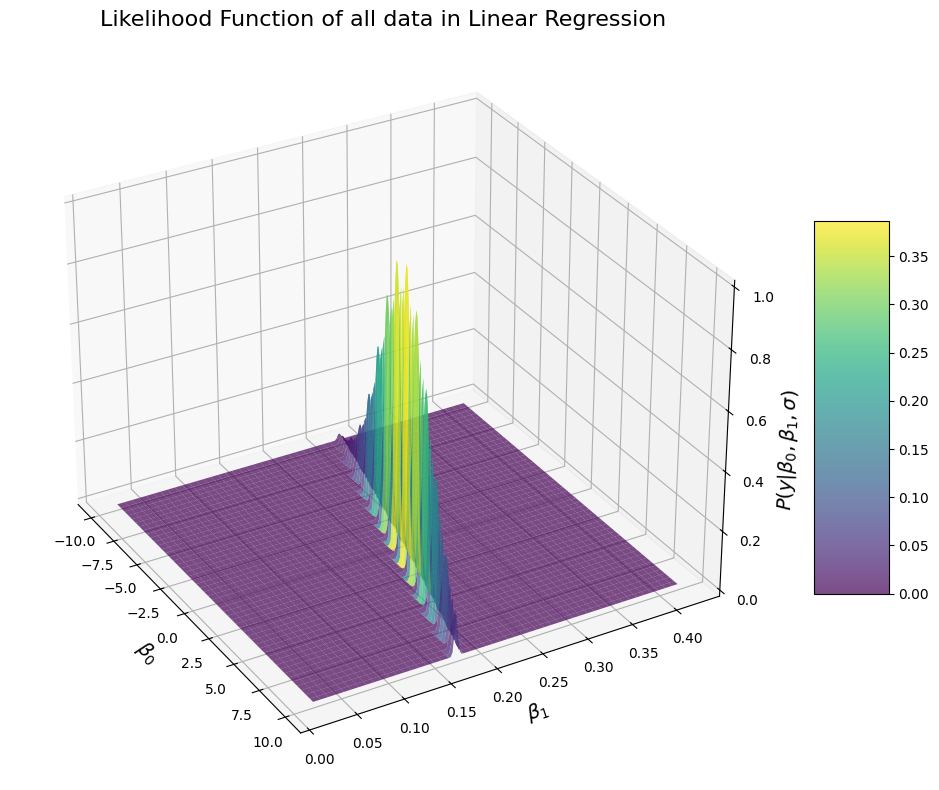

In [4]:
# Set the parameters:
beta_0_gt = 0
beta_1_gt = 0.22
error_mu = 0
error_sigma = 2

# Simulate some data:
y = linear_mdl(flipper_length_mm, beta_0_gt, beta_1_gt, error_mu, error_sigma)

# Plot the probability of each observation across several values of b0 and b1:
b0s = np.linspace(beta_0_gt -10, beta_0_gt + 10, 200)
b1s = np.linspace(beta_1_gt - 0.2, beta_1_gt + 0.2, 200)
B0s, B1s  = np.meshgrid(b0s, b1s)
y_likelihood = np.zeros(B0s.shape)
for i, b0 in enumerate(b0s):
    for ii, b1 in enumerate(b1s):
        y_likelihood[ii, i] = lm_likelihood(y, flipper_length_mm, b0, b1, error_sigma)
# Normalize by max to improve viz
y_likelihood /= np.max(y_likelihood)
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(B0s, B1s, y_likelihood, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
# Customize the axes
ax.set_xlabel(r'$\beta_0$', fontsize=14)
ax.set_ylabel(r'$\beta_1$', fontsize=14)
ax.set_zlabel(r'$P(y|\beta_0, \beta_1, \sigma)$', fontsize=14)
ax.set_title('Likelihood Function of all data in Linear Regression', fontsize=16)
# Adjust viewing angle for better visualization
ax.view_init(elev=30, azim=-30)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

Hm, okay, that doesn't look quite like what you may have expected. Let's think about it for a sec. The likelihood is once again very elongated, which means that there is some sort of a correlation between $\beta_0$ and $beta_1$ in terms of likelihood. Indeed, the observed data are more likely for particular values of $\beta_0$ and $beta_1$, but the pairs of values of $\beta_0$ and $beta_1$ for which the data are most likely clearly follow a line. Why is that? There is actually a very good reason. It's because the different values of $beta_1$, you can adjust the intercept $\beta_0$ to make them fit the data better. Or the other way around, you can offset changes in the intercept by changing the slope to make the data fit better. Here is a vizualization for why that's the case

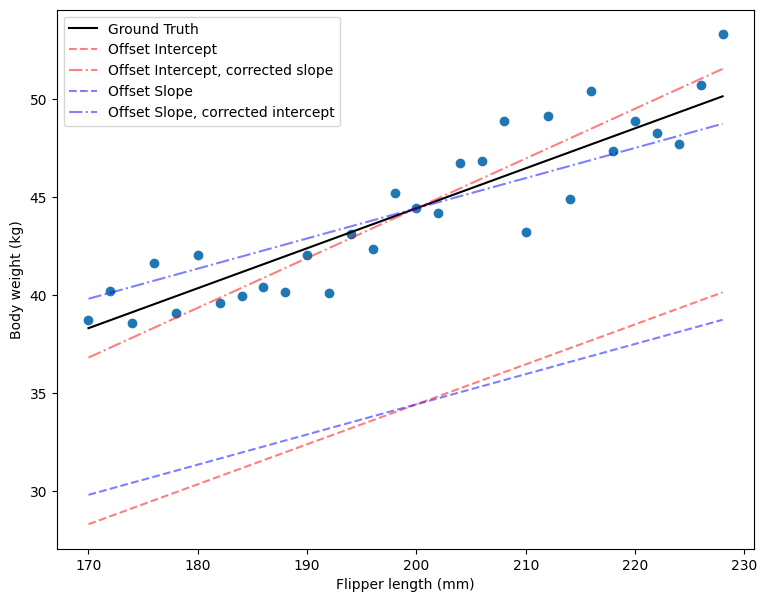

In [5]:
# Plot the data:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(flipper_length_mm, y)  # Plot the simulated data
ax.plot(flipper_length_mm, beta_0 + beta_1 * flipper_length_mm, color='k', linestyle='-', label='Ground Truth')  # Plot the regression line
ax.plot(flipper_length_mm, beta_0-10 + beta_1 * flipper_length_mm, alpha=0.5, color='r', linestyle='--', label='Offset Intercept')  # Plot the regression line
ax.plot(flipper_length_mm, beta_0-10 + (0.05+beta_1) * flipper_length_mm, alpha=0.5, color='r', linestyle='-.', label='Offset Intercept, corrected slope')  # Plot the regression line
ax.plot(flipper_length_mm, beta_0 + (-0.05+beta_1) * flipper_length_mm, alpha=0.5, color='b', linestyle='--', label='Offset Slope')  # Plot the regression line
ax.plot(flipper_length_mm, beta_0 + 10 + (-0.05+beta_1) * flipper_length_mm, alpha=0.5, color='b', linestyle='-.', label='Offset Slope, corrected intercept')  # Plot the regression line
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body weight (kg)')
ax.legend()
plt.show()
plt.close()

You can see in the plot above that when the intercept parameter $\beta_0$ is far from its ground truth value (as indicated by the red lines), you can still obtain a line that closely approximates the true relationship by adjusting the slope parameter $\beta_1$. Similarly, if β1β1​ deviates from its true value (as shown by the blue lines), adjusting $\beta_0$ can compensate for this discrepancy, resulting in a line that aligns well with the observed data. This illustrates why there is a correlation between $\beta_0$ and $\beta_1$ in the likelihood function: there are multiple pairs of $\beta_0$ and $\beta_1$ that yield similar fits to the data. Adjusting one parameter can offset changes in the other, allowing the model to maintain a good approximation of the true relationship.

If you recall the formula for the likelihood function, the likelihood is higher when the squared error term $[y_i-(\beta_0 + \beta_1x_i)]^2$ is minimized. This means that parameter values producing predictions close to the actual observations result in a larger likelihood. Therefore, combinations of $\beta_0$ and $\beta_1$ that minimize this error term will make the data more probable under the model.

In other words, the data are most likely under parameters where the predicted values are least different from the actual observations. Because there are multiple pairs of $\beta_0$ and $\beta_1$ (not just the ground truth values) that can produce predictions close to the observed data—and because adjustments in one parameter can be compensated by changes in the other—we observe this elongated shape in the likelihood surface.

Whenever you see an elongated shape like this in a likelihood plot, it indicates that the two variables on the axes—in our case, $\beta_0$ and $\beta_1$-are correlated. It's important to clearly understand what we mean by this correlation, so I will repeat it one last time: it means that the likelihood of the data remains high for certain combinations of $\beta_0$ and $\beta_1$, and that changing one parameter can be offset by adjusting the other to maintain a similar level of fit to the data.

Now you might think that in our current example, it is what it is: $\beta_0$ and $\beta_1$ are correlated in terms of likelihood. It is after all true that in what we saw above, there are specific pairs of $\beta_0$ and $\beta_1$ that yield a line that is a good approximation of the data, and simply because of how our model is constructed, these values of $\beta_0$ and $\beta_1$ are correlated: if we increase $\beta_0$, we can salvage it by reducing $\beta_1$ and the other way around. Why would we want to do anything about it, if it is just the way it is? Well actually, we do want to do something about it, because as we will see below, it is a bit of a problem. In short, there are several related issues posed by this correlation: 
- the estimates may become unreliable, because it makes it more likely when you are dealing with real data that the parameters you retrieve with the OLS method are off, because you get a wrong $\beta_0$ and its compensatory $\beta_1$ or the other way around
- it increases the domain of $\beta_0$ and $\beta_1$ under which the data are likely, which impacts the computation of the $\sigma$ parameter as we will see in a bit.

And as it turns out, there is actually a simple way in which we can deal with this issue: centering $x$, meaning you subtract the mean flipper length from each penguin flipper length. This results in the mean of the centered $x$ to be 0 instead of the actual mean value. That way, changed in $\beta_0$ represents the mean of the data and $beta_1$ the slope of the correlation between flipper length and weight, and $beta_0$ and $beta_1$ become independent. This is why it is always a good idea to center your predictors. We can see what that looks like:

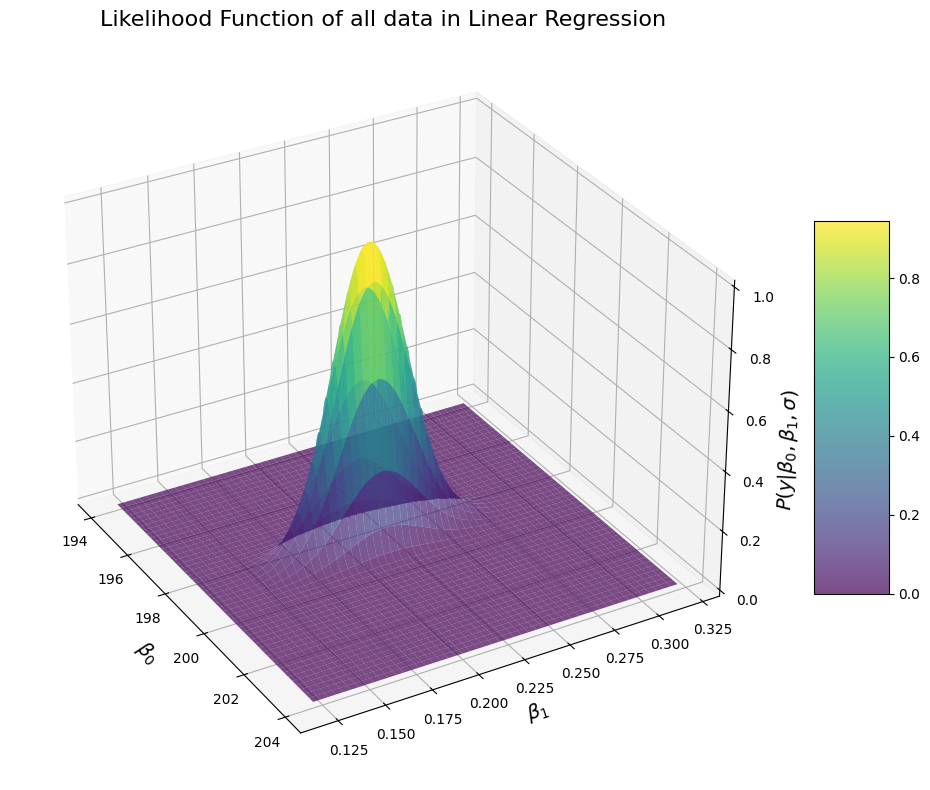

In [6]:
# Set the parameters:
beta_0_gt = np.mean(flipper_length_mm)
beta_1_gt = 0.22
error_mu = 0
error_sigma = 2

x_centered = flipper_length_mm - beta_0_gt
# Simulate some data:
y = linear_mdl(x_centered, beta_0_gt, beta_1_gt, error_mu, error_sigma)

# Plot the probability of each observation across several values of b0 and b1:
b0s = np.linspace(beta_0_gt -5, beta_0_gt + 5, 1000)
b1s = np.linspace(beta_1_gt - 0.1, beta_1_gt + 0.1, 1000)
B0s, B1s  = np.meshgrid(b0s, b1s)
y_likelihood = np.zeros(B0s.shape)
for i, b0 in enumerate(b0s):
    for ii, b1 in enumerate(b1s):
        y_likelihood[ii, i] = lm_likelihood(y, x_centered, b0, b1, error_sigma)
# Normalize by max to improve viz
y_likelihood /= np.max(y_likelihood) 
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(B0s, B1s, y_likelihood, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
# Customize the axes
ax.set_xlabel(r'$\beta_0$', fontsize=14)
ax.set_ylabel(r'$\beta_1$', fontsize=14)
ax.set_zlabel(r'$P(y|\beta_0, \beta_1, \sigma)$', fontsize=14)
ax.set_title('Likelihood Function of all data in Linear Regression', fontsize=16)
# Adjust viewing angle for better visualization
ax.view_init(elev=30, azim=-30)
# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()
plt.close()

Now that looks better: it is nice bell surface. This makes intuitive sense and is what we were expecting since the very beginning: the data are most likely around a given parameter of $\beta_0$ and $\beta_1$ (i.e. the peak of the bell) and they decrease when we go away from both $\beta_0$ and $\beta_1$ values in a way consistent with a normal distribution. Note that in order to generate this surface, we did not specify the fitted values of $\beta_0$ and $\beta_1$ from the optimal least square, nor the ground truth values of $\beta_0$ and $\beta_1$. Yet, the surface seems to be concentrated on a particular point that is close to what we would expect. We can find the parameters for which $\beta_0$ and $\beta_1$ the likelihood of our data is maximum:

In [7]:
print("The maximum likelihood of the data is observed at:")
print(f"b0={B0s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}")
print(f"b1={B1s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}")
print("The ground truth values are:")
print(f"b0={beta_0_gt:.2f}")
print(f"b1={beta_1_gt:.2f}")
print("Fitted values with OLS:")
print(f"b0={fit_linear_model(y, x_centered)[0]:.2f}")
print(f"b1={fit_linear_model(y, x_centered)[1]:.2f}")

The maximum likelihood of the data is observed at:
b0=198.62
b1=0.21
The ground truth values are:
b0=199.00
b1=0.22
Fitted values with OLS:
b0=198.62
b1=0.21


The likelihood of the data is maximal for values of $\beta_0$ and $\beta_1$ that are almost the same as what we obtain with the OLS method. Well in fact, they would be exactly the same if we were to sample the $\beta_0$ and $\beta_1$ more (i.e. if instead of taking a 1000 samples in the interval we took 10000 or more). This makes sense: the OLS finds the values of $\beta_0$ and $\beta_1$ that minimize the error, and the likelihood of observing the data is maximum for the parameters of  $\beta_0$ and $\beta_1$ that minimize the error. So you can think about it that way: the OLS finds the values of  $\beta_0$ and $\beta_1$ under which the data are the most likely, or that the OLS finds the peak of the likelihood. It's important to understand the distinction: the OLS returns single points, while the likelihood is a distribution. 

This brings us to another important term you may have come across: **Maximum Likelihood Estimates (MLE)**. The  $\beta_0$ and $\beta_1$ values you get with the OLS are the maximum likelihood estimates of these parameters, because well, they are the estimates for which the likelihood is maximum. So that also adds up.

So here it is, we have figured out the likelihood function for our linear model:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-(\beta_0 + \beta_1x_i)]^2}{2\sigma^2}}$$

and provided that the values of x are centered (i.e. there is no correlation between $\beta_0$ and $\beta_1$ anymore), the likelihood looks like a bell. There is one important thing we need to add for completeness' sake. In our example, we have only one regressor. But in a linear model, we can have many (in which case we have a multiple regression). The likelihood formulae remains almost the same, only we need to add the additional betas:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-(\sum_{k=0}^{m}{\beta_kx_k})]^2}{2\sigma^2}}$$

With $m$ regressors $k$

Now it becomes obvious why the matrix notation may become handy. The exponential term is a bit complicated and tough to read. We can reformulate the above like so:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-X\Beta]^2}{2\sigma^2}}$$

That's exactly the same thing, just a bit less clunky. 

## The error term and estimation of the $\sigma$ parameter 

Unfortunately, we aren't done just yet... There is one thing we haven't talked about: what about the $\sigma$ parameter? So far, we have seen that the likelihood of the data can be determined for each pair of $\beta_0$ and $\beta_1$ values and that we can use the OLS formula to find the peak of the likelihood (the values of $\beta_0$ and $\beta_1$ under which the data are most likely), but we always kept $\sigma$ constant. And we always used the ground truth value of $\sigma$. Obviously, when we are dealing with actual data (rather than simulated ones), we don't know the true value of $\sigma$, i.e. we don't know what the true amount of variation around our predicted values (from our model) there is.  

But we everything you have learned so far, you might already know where this is going. You might in fact wonder: "what about $\sigma$?" As in, do we actually need to do anything about it? Well the answer is no. In the previous example, we simply set value of $\sigma$ to the ground truth just for conveniences' sake and because it is not possible to draw a graph with more than 3 dimensions. But since the beginning, $\sigma$ is an input to the likelihood function, which means that the likelihood function shows the likelihood of the data under any values of $\beta_0$ and $\beta_1$ but also $\sigma$. We can plot the likelihood function for different values of $\sigma$ to see what that looks like:

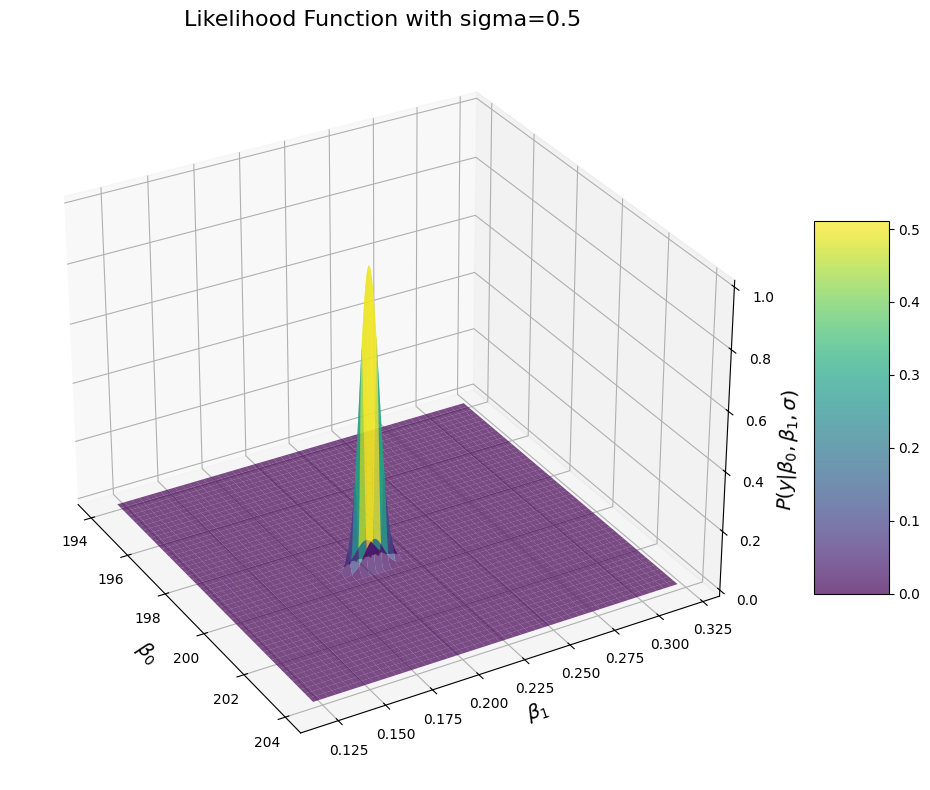

The maximum likelihood of the data is observed at:
b0=199.62
b1=0.20


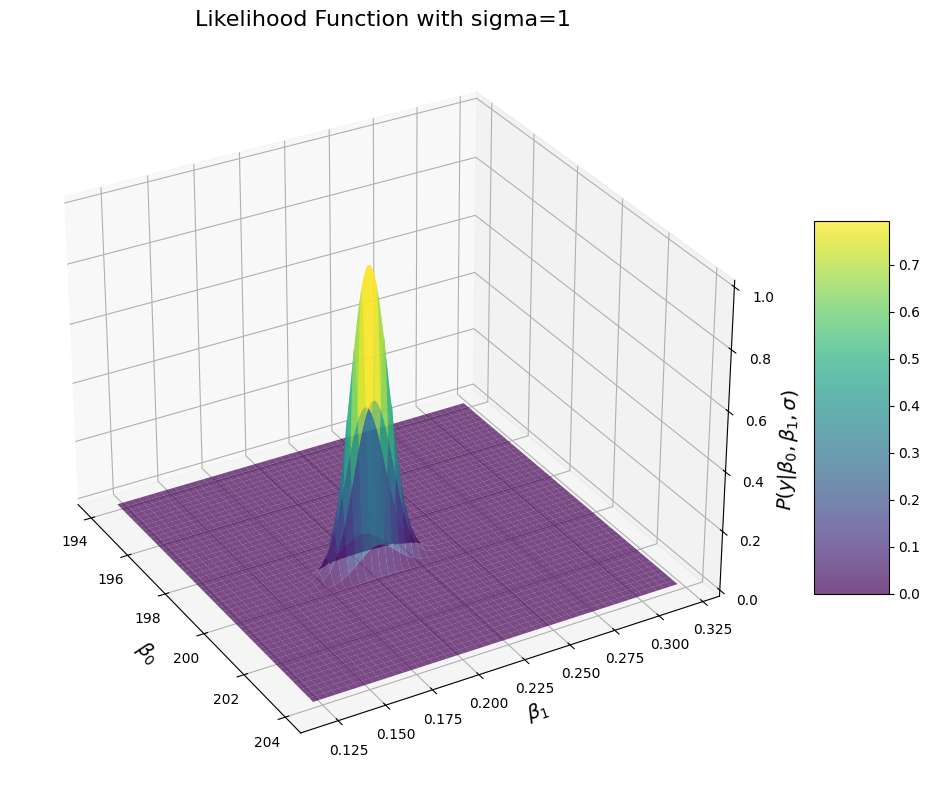

The maximum likelihood of the data is observed at:
b0=199.62
b1=0.20


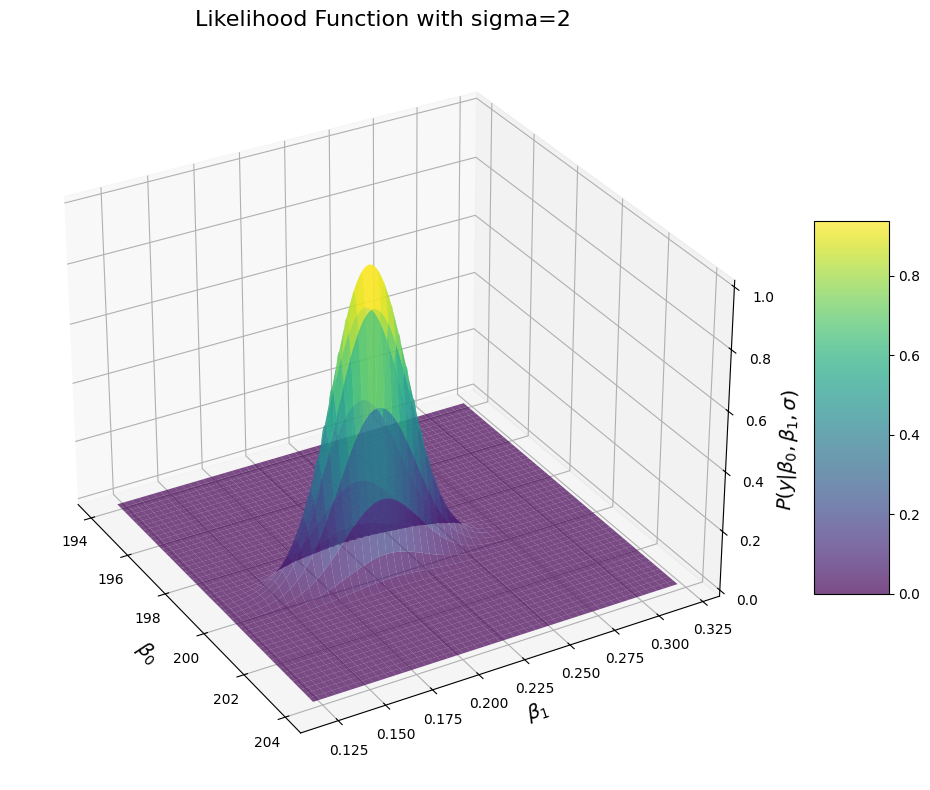

The maximum likelihood of the data is observed at:
b0=199.62
b1=0.20


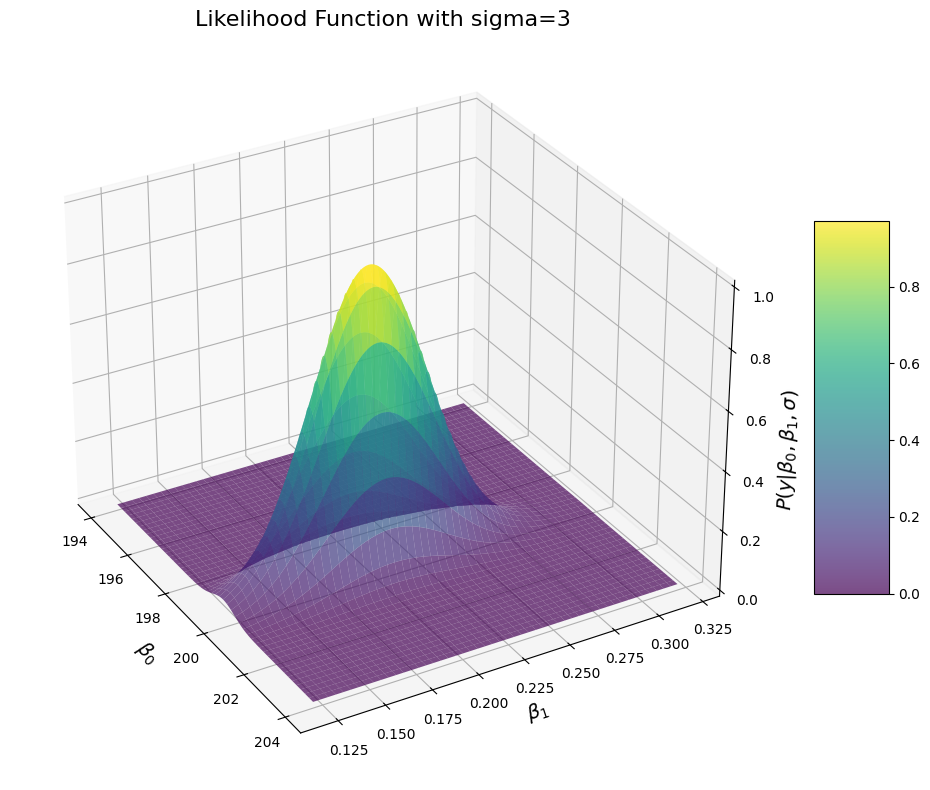

The maximum likelihood of the data is observed at:
b0=199.62
b1=0.20


KeyboardInterrupt: 

In [8]:
# Set the parameters:
beta_0_gt = np.mean(flipper_length_mm)
beta_1_gt = 0.22
error_mu = 0
error_sigma = 2

x_centered = flipper_length_mm - beta_0_gt
# Simulate some data:
y = linear_mdl(x_centered, beta_0_gt, beta_1_gt, error_mu, error_sigma)

# Plot the probability of each observation across several values of b0 and b1:
b0s = np.linspace(beta_0_gt -5, beta_0_gt + 5, 1000)
b1s = np.linspace(beta_1_gt - 0.1, beta_1_gt + 0.1, 1000)
B0s, B1s  = np.meshgrid(b0s, b1s)

# Plot the data with different values of sigma:
for sigma in [0.5, 1, 2, 3, 4]:
    y_likelihood = np.zeros(B0s.shape)
    for i, b0 in enumerate(b0s):
        for ii, b1 in enumerate(b1s):
            y_likelihood[ii, i] = lm_likelihood(y, x_centered, b0, b1, sigma)
    # Normalize by max to improve viz
    y_likelihood /= np.max(y_likelihood) 
    # Create the plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface
    surf = ax.plot_surface(B0s, B1s, y_likelihood, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
    # Customize the axes
    ax.set_xlabel(r'$\beta_0$', fontsize=14)
    ax.set_ylabel(r'$\beta_1$', fontsize=14)
    ax.set_zlabel(r'$P(y|\beta_0, \beta_1, \sigma)$', fontsize=14)
    ax.set_title(f'Likelihood Function with sigma={sigma}', fontsize=16)
    # Adjust viewing angle for better visualization
    ax.view_init(elev=30, azim=-30)
    # Add a color bar
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()
    plt.close()
    # Print the MLE for beta 0 and beta 1:
    print("The maximum likelihood of the data is observed at:")
    print(f"b0={B0s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}")
    print(f"b1={B1s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}")

You can see that when we increase the sigma, the distribution becomes wider, which means that the likelihood for values close to the MLE increases. That makes sense too: if $\sigma$ was truly close to 0, then we would have almost 0 error and we should be very confident in our estimates. In comparison, if the true value of sigma is larger, then we should have more noisy measurement, and there would be more values of $\beta_0$ and $\beta_1$ under which the values would be likely. Another way to see what that is obvious is to look at the formulae of the distribution.

Importantly, that doesn't mean that the likelihood of $y$ is maxed when $\sigma$ is 0. We can see that easily by comparing the likelihood observed at the MLE of $\beta_0$ and $\beta_1$:

In [9]:
# Plot the data with different values of sigma:
for sigma in [0.5, 1, 2, 3, 4]:
    y_likelihood = np.zeros(B0s.shape)
    for i, b0 in enumerate(b0s):
        for ii, b1 in enumerate(b1s):
            y_likelihood[ii, i] = lm_likelihood(y, x_centered, b0, b1, sigma) 
    # Print the MLE for beta 0 and beta 1:
    print(f"P(y|{B0s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}, {B1s[np.where(y_likelihood == np.max(y_likelihood))][0]:.2f}, {sigma}) = {np.max(y_likelihood)}")

P(y|198.75, 0.19, 0.5) = 5.43811210748569e-120
P(y|198.75, 0.19, 1) = 8.843283594454096e-42
P(y|198.75, 0.19, 2) = 5.323901345637373e-29
P(y|198.75, 0.19, 3) = 3.0372233537737223e-30
P(y|198.75, 0.19, 4) = 1.4059154657678168e-32


The maximal likelihood values are really low overall, but we can see that the likelihood values peak at $\sigma=2$. This implies that the data are maximally likely at $beta_0=198$, $beta_0=0.24$ and $\sigma=2$ or close thereof. So this also adds up: just as the data were most likely for $\beta_0$ and $\beta_1$ parameter close to our ground truth, the data are also most likely when the $\sigma$ is close to the ground truth. So that also makes sense.

And just as there was a function to estimate $\beta_0$ and $beta_1$ values with which the likelihood of the data are maximized, there is a function to find the value of $\sigma$ that maximizes the likelihood of the data:

$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}[y_i-(\hat{\Beta}X)]$$

This is the matrix notation, which is equivalent to:

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}[y_i-(\sum_{k=1}^{m}\beta_k x_k)]$$

Where $\hat{\beta}$ are the estimates of the beta parameters obtains with the OLS (which are teh same as the MLE of the $\beta$ parameters). This formulae looks very familiar, because it is also exactly the same as the one used before to compute the **residual sum of square error (RSS)**. It is just adjusted by dividing by the number of observation. This is also very logical: the $\sigma$ under which the data are the most likely is basically the observed amount of variation we have around our line of best fit, normalized by the number of observation, as otherwise the most likely value of $\sigma$ would always be larger when we have more data. This wouldn't be right, because the same value of $\sigma$ could be used to generate 10 data points or a 1000. 

## Likelihood function: recap
That was a bit long, but now you know everything there is to know about the likelihood function of the linear model. To recap, we saw that for a linear model defined as:

$$y = \beta_0 + \beta_1x_i + \epsilon$$

Which is equivalent to:

$$y = \Beta X + \epsilon$$

For which the error is normally distributed and independently and identically distributed (i.i.d.):

$$\epsilon \sim \mathcal{N}(0, \sigma^2)$$

The maximal likelihood estimates of $\beta_0$, $\beta_1$ and $\sigma$ are:

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}[y_i-(\sum_{k=1}^{m}\beta_k x_k)]$$


And finally, the likelihood of our observations given the parameters is defined as:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-(\sum_{k=0}^{m}{\beta_kx_k})]^2}{2\sigma^2}}$$

Which is equivalent to:

$$P(y|\beta_0, \beta_1, \sigma) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n\prod_{i=1}^{n}exp^{-\frac{[y_i-X\Beta]^2}{2\sigma^2}}$$

One last thing: the current formula for the OLS assumes that there are only 2 regressors (intercept and  $x$), but we can write the formula to be a bit more general. In that case, it would be really cumbersome to write without relying on the matrix format, so we will stick to that:

$$\hat{\Beta} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^Ty$$

Okay, with that we have everything we need for the likelihood. And just one last thing: notice that I have been very precise in the phrasing in this section, the likelihood tells us the likelihood of the data under various values of the parameters of our model.